# Week 5, Data science in Neuroscience


## Plan for this week

1. Introduction to pytorch
2. Tensors
3. Training loop in pytorch
4. A first neural network
5. A convolutional network to process images

***



<div>
<img src="../images/pytorch.png" width="400"/>
</div>

Pytorch is a Python library that facilitates building deep learning projects

* Store data into Tensors (multidimensional arrays that are similar to NumPy arrays)
* Allows fast calculations on dedicated hardware (GPUs)
* Ability of tensors to keep track of the operations performed on them and to analytically compute derivatives
* Classes to deal with datasets
* Classes to simplify building deep neural networks

# Tensors

pytorch tensors are very similar to NumPy arrays. They have 2 main advantages

* Used to do calculations on a GPU
* Can keep track of the graph of computations that created them (used to calculate derivatives) 

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

Creating tensors

In [2]:
torch.ones(5)

tensor([1., 1., 1., 1., 1.])

In [3]:
torch.zeros(3,4)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [4]:
a = torch.tensor([[1.0,2],[3,4]])
a

tensor([[1., 2.],
        [3., 4.]])

You can interrogate a tensor just like a NumPy array.

In [5]:
print("shape:", a.shape)
print("ndim:", a.ndim)
print("dtype:", a.dtype)

shape: torch.Size([2, 2])
ndim: 2
dtype: torch.float32


Many of the mathematical functions of NumPy have a torch equivalent.

In [6]:
b = torch.rand(24).reshape(4,6)
b

tensor([[0.5643, 0.3636, 0.0588, 0.1014, 0.4120, 0.7961],
        [0.3345, 0.9139, 0.5665, 0.0605, 0.8563, 0.5361],
        [0.0987, 0.3219, 0.7762, 0.5836, 0.3335, 0.6292],
        [0.6037, 0.5494, 0.7537, 0.8002, 0.6820, 0.6273]])

In [7]:
b.shape

torch.Size([4, 6])

In [8]:
b.mean()

tensor(0.5135)

In [9]:
b.mean(axis=0)

tensor([0.4003, 0.5372, 0.5388, 0.3864, 0.5710, 0.6472])

We can add an extra dimension with a size of 1 using unsqueeze().

In [10]:
b.shape

torch.Size([4, 6])

In [11]:
b.unsqueeze(0).shape

torch.Size([1, 4, 6])

We can do broadcasting, just like with NumPy arrays.

```
When operating on two arrays, pytorch compares their shapes element-wise. It starts with the trailing (i.e. rightmost) dimensions and works its way left. Two dimensions are compatible when
​
* they are equal, or
* one of them is 1
```


In [12]:
b.shape

torch.Size([4, 6])

In [13]:
a = torch.ones(4)
a.shape

torch.Size([4])

In [14]:
#b+a

In [15]:
A = a.unsqueeze(1)
A.shape

torch.Size([4, 1])

In [16]:
b+A

tensor([[1.5643, 1.3636, 1.0588, 1.1014, 1.4120, 1.7961],
        [1.3345, 1.9139, 1.5665, 1.0605, 1.8563, 1.5361],
        [1.0987, 1.3219, 1.7762, 1.5836, 1.3335, 1.6292],
        [1.6037, 1.5494, 1.7537, 1.8002, 1.6820, 1.6273]])

We can change the order of the dimensions in a tensor with `.permute()

In [17]:
b = torch.rand(3*24).reshape(3,4,6)
b

tensor([[[0.2732, 0.4913, 0.1348, 0.2602, 0.3437, 0.6902],
         [0.6937, 0.5498, 0.1961, 0.4038, 0.6848, 0.9426],
         [0.3854, 0.8371, 0.1074, 0.0799, 0.8979, 0.5499],
         [0.7613, 0.8279, 0.4812, 0.8052, 0.3945, 0.6152]],

        [[0.4457, 0.3896, 0.3526, 0.1966, 0.9213, 0.1886],
         [0.0726, 0.3903, 0.8233, 0.1339, 0.6361, 0.1045],
         [0.2099, 0.9881, 0.7995, 0.3617, 0.4845, 0.7368],
         [0.1551, 0.0467, 0.8169, 0.8689, 0.0266, 0.9562]],

        [[0.2862, 0.3506, 0.8126, 0.0231, 0.5962, 0.5662],
         [0.2598, 0.6553, 0.1610, 0.9103, 0.3629, 0.2832],
         [0.5790, 0.7317, 0.2689, 0.6765, 0.3912, 0.8889],
         [0.4111, 0.4991, 0.2188, 0.5119, 0.9664, 0.9344]]])

In [18]:
b.shape

torch.Size([3, 4, 6])

In [19]:
b = b.permute(1,2,0)
b.shape

torch.Size([4, 6, 3])

### Moving tensors to the GPU

Once you moved your tensors to the GPU, calculations on these tensors will be performed on the GPU. 

In [98]:
b = torch.rand(10)
b

tensor([0.7350, 0.0247, 0.5534, 0.2948, 0.2744, 0.7877, 0.6529, 0.1857, 0.8128,
        0.5667])

In [99]:
torch.cuda.is_available()

True

In [100]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

Using device: cuda



In [101]:
b

tensor([0.7350, 0.0247, 0.5534, 0.2948, 0.2744, 0.7877, 0.6529, 0.1857, 0.8128,
        0.5667])

In [102]:
b = b.to(device)

In [103]:
b

tensor([0.7350, 0.0247, 0.5534, 0.2948, 0.2744, 0.7877, 0.6529, 0.1857, 0.8128,
        0.5667], device='cuda:0')

In [104]:
b = b.to("cpu")
b

tensor([0.7350, 0.0247, 0.5534, 0.2948, 0.2744, 0.7877, 0.6529, 0.1857, 0.8128,
        0.5667])

In [105]:
#b = b.to("cuda")
#b

## From pytorch tensors to NumPy arrays and back

You can go between tensors and NumPy arrays using `torch.from_numpy()` and `myTensor.numpy()`

In [27]:
points_pt = torch.tensor([2,3,4])
print(type(points_pt))
points_np = points_pt.numpy()
print(type(points_np))

<class 'torch.Tensor'>
<class 'numpy.ndarray'>


In [28]:
a = np.array([1,2,3,4])
torch.from_numpy(a)

tensor([1, 2, 3, 4])

# Training a model using pytorch

We will recreate our machine learning example of week 2 using pytorch.

We want to predict the firing rate of a neuron from the running speed of the animal.


In [29]:
fn = "../data/animal_speed.npy"

In [30]:
speed = np.load(fn)
speed = speed[0:100]

In [31]:
w = 1.25 # weight (slope)
b = 10 # bias (intercept)
np.random.seed(0)
e = np.random.normal(loc=0.0, scale=5, size = speed.shape[0]) # random numbers taken from a normal distribution

rate = speed* w + b + e # simulate the firing rate
rate = np.maximum(0, rate) # eliminate the negative firing rates

Text(0, 0.5, 'Firing rate (Hz)')

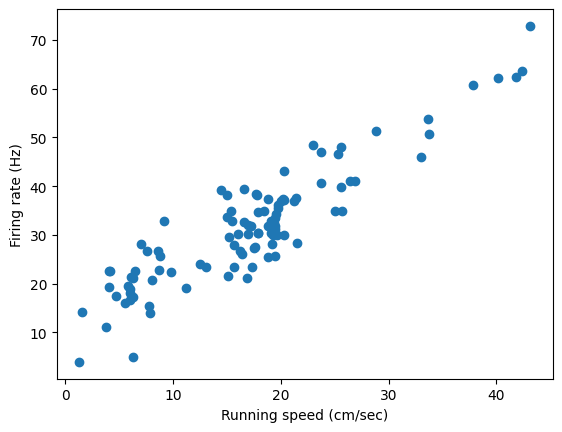

In [32]:
plt.scatter(speed,rate)
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")

### Create a model with pytorch

We will recreate our **linear regression model** using pytorch. 


$yhat = b+ w*X$

We will create our model by defining a class. 

There are simpler ways to create simple models in pytorch. But the way presented here is the very flexible. We can create all our models by just modifying our class.

<img src="../images/neuron_linear.png" width="500" align="center">

https://pytorch.org/docs/stable/generated/torch.nn.Linear.html

This is **not a neural network**, but a linear model.

In [33]:
import torch.nn as nn

class Lin_model(nn.Module):
    """
    Class to create pytorch model.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.linLayer = nn.Linear(in_features=1, out_features=1, bias=True)
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.linLayer(x)
        return out

In [34]:
lin_model = Lin_model() # create model from our class definition

The parameters of the models are created automatically when creating the model.

We can use this for loop to print the parameters.

In [35]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.9196]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.3263], requires_grad=True)


### Loss function

pytorch has built-in loss functions that we can use in our training loop. We will use the mean squared error (MSE).

In [36]:
# loss function returning MSE
loss_fn = torch.nn.MSELoss()

### pytorch optimizers

Optimizers are used to change our model parameters during learning.

There are several optimization strategies and tricks that can improve learning. 

There are more important when building deep neural networks than for linear regression models.

Let's see how to use the SGD optimizer.

In [37]:
import torch.optim as optim

In [38]:
learning_rate = 0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)

### Correct data format for our model

* X: input data
* y: labels or values that we want to predict


We need to store them in `tensors`.

The first dimension (rows) is for the observations.

We only have 1 input feature (speed), so the second dimension will have a size of 1.

In [39]:
X = torch.from_numpy(speed).unsqueeze(1).float()

In [40]:
X.shape

torch.Size([100, 1])

In [41]:
y = torch.from_numpy(rate).unsqueeze(1).float()
y.shape

torch.Size([100, 1])

### One forward pass 

We now all our needed element to train our model.

Before using our training loop, it is a good idea to run one forward pass outside of the for loop to identify potential problems.

We run all the steps that will be in our training loop.

In [42]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[-0.9196]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.3263], requires_grad=True)


In [43]:
print("Number of parameters:", sum(p.numel() for p in lin_model.parameters()))

Number of parameters: 2


In [44]:
yhat = lin_model(X)

In [45]:
loss = loss_fn(yhat,y)

In [46]:
optimizer.zero_grad() # zero the gradients

In [47]:
loss.backward() # calculate gradients

In [48]:
optimizer.step() # will change the model parameters to reduce the loss        

In [49]:
for name,p in lin_model.named_parameters():
    print(name,p)

linLayer.weight Parameter containing:
tensor([[1.0619]], requires_grad=True)
linLayer.bias Parameter containing:
tensor([-0.2308], requires_grad=True)


### Training loop

We want a generic training loop that will work in most situations.

In [50]:
## training loop that will modify our parameters to minimize the loss function (MSE)
def training_loop(n_epochs, optimizer, loss_fn, model, X,y):
    for epoch in range (n_epochs):
        
        yhat = model(X) # make predictions
        loss = loss_fn(yhat,y) # calculate the loss
        optimizer.zero_grad() # zero the gradients of our model's parameters
        loss.backward() # calculate gradients of the model's parameters
        optimizer.step() # will change the model parameters to reduce the loss
        
        
        if epoch % 1000 ==0 or epoch < 10:
            print("Epoch: {}, Loss: {}".format(epoch,loss))
    return

In [51]:
training_loop(n_epochs = 20000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 216.7495880126953
Epoch: 1, Loss: 61.03697204589844
Epoch: 2, Loss: 51.171871185302734
Epoch: 3, Loss: 50.52776336669922
Epoch: 4, Loss: 50.4666748046875
Epoch: 5, Loss: 50.44245910644531
Epoch: 6, Loss: 50.42058563232422
Epoch: 7, Loss: 50.398887634277344
Epoch: 8, Loss: 50.37721252441406
Epoch: 9, Loss: 50.355552673339844
Epoch: 1000, Loss: 35.959205627441406
Epoch: 2000, Loss: 29.82477378845215
Epoch: 3000, Loss: 27.24588394165039
Epoch: 4000, Loss: 26.161733627319336
Epoch: 5000, Loss: 25.705949783325195
Epoch: 6000, Loss: 25.514341354370117
Epoch: 7000, Loss: 25.433788299560547
Epoch: 8000, Loss: 25.399919509887695
Epoch: 9000, Loss: 25.38568687438965
Epoch: 10000, Loss: 25.379701614379883
Epoch: 11000, Loss: 25.377187728881836
Epoch: 12000, Loss: 25.376127243041992
Epoch: 13000, Loss: 25.375682830810547
Epoch: 14000, Loss: 25.37549591064453
Epoch: 15000, Loss: 25.375417709350586
Epoch: 16000, Loss: 25.375383377075195
Epoch: 17000, Loss: 25.3753719329834
Epoch: 180

In [52]:
for p in lin_model.parameters():
    print(p)

Parameter containing:
tensor([[1.2343]], requires_grad=True)
Parameter containing:
tensor([10.5677], requires_grad=True)


In [53]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [54]:
lin_yhat = lin_model(t_range)

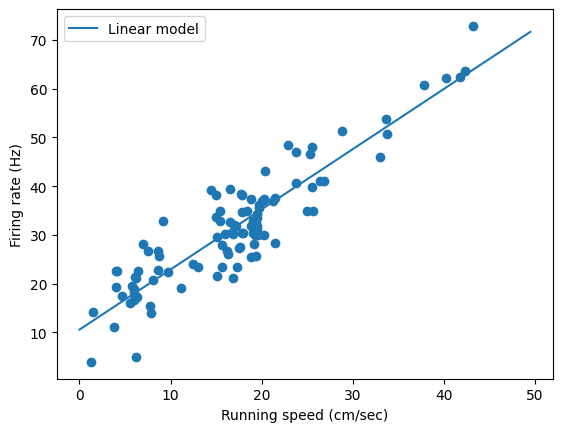

In [55]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

We found the parameters that were used to simulate the data.

# A first neural network

* Mathematical entities capable of representing complicated functions through a composition of simpler functions.
* Deep neural network have **multiple layers** between the input and output layers. 
* Each layer has several artificial neurons. 
* New data comes from the left, and calculations propagates towards the ouput layer.



***

* A neuron in a neural network has one more non-linear function. 

<img src="../images/artificial_neuron.png" width="500" align="center">

The non-linear function allows the model to have different slope at different values.

The non-linear function of the neuron is called the **activation function**.

Text(0.5, 1.0, 'Non-linear model: tanh(w*x+b)')

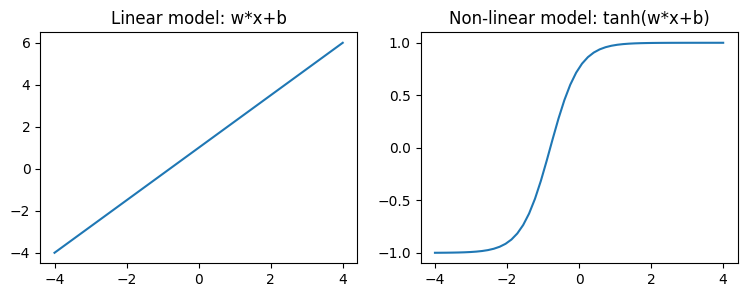

In [56]:
nrow=1
ncol=2
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3))

XX = np.linspace(-4,4) # input
          
w=1.25
b=1.0
                
ax[0].plot(XX,w*XX+b)
ax[0].set_title("Linear model: w*x+b")

ax[1].plot(XX,np.tanh(w*XX+b))
ax[1].set_title("Non-linear model: tanh(w*x+b)")

In neural network, we have **several artificial neurons**. 

The output of several neurons is summed to get the output.

Let's build a neural network to predict the firing rate from the speed of the animal.

In [57]:
class NN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=5, bias=True)
        self.tanh = nn.Tanh()
        self.layer2 = nn.Linear(in_features=5, out_features=1, bias=True)
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.layer1(x)
        out = self.tanh(out)
        out = self.layer2(out)
        return out

In [58]:
nn_model = NN_model()

In [59]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.0490],
        [ 0.2047],
        [-0.0643],
        [ 0.1794],
        [ 0.4759]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 0.7064,  0.9974, -0.6358, -0.7729, -0.8862], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-0.3902,  0.1453, -0.0862,  0.2697,  0.1653]], requires_grad=True)
layer2.bias Parameter containing:
tensor([-0.2552], requires_grad=True)


In [60]:
print("Number of parameters:", sum(p.numel() for p in nn_model.parameters()))

Number of parameters: 16


In [61]:
learning_rate=0.0001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)

In [62]:
training_loop(n_epochs = 30000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 1151.188720703125
Epoch: 1, Loss: 1148.6005859375
Epoch: 2, Loss: 1145.8614501953125
Epoch: 3, Loss: 1142.8221435546875
Epoch: 4, Loss: 1139.067138671875
Epoch: 5, Loss: 1133.0771484375
Epoch: 6, Loss: 1119.525634765625
Epoch: 7, Loss: 1104.4410400390625
Epoch: 8, Loss: 1098.95361328125
Epoch: 9, Loss: 1095.471435546875
Epoch: 1000, Loss: 229.09703063964844
Epoch: 2000, Loss: 115.322021484375
Epoch: 3000, Loss: 85.236572265625
Epoch: 4000, Loss: 71.20855712890625
Epoch: 5000, Loss: 63.967140197753906
Epoch: 6000, Loss: 68.72758483886719
Epoch: 7000, Loss: 54.68235397338867
Epoch: 8000, Loss: 60.239315032958984
Epoch: 9000, Loss: 53.71757507324219
Epoch: 10000, Loss: 77.73603820800781
Epoch: 11000, Loss: 63.7680778503418
Epoch: 12000, Loss: 47.994503021240234
Epoch: 13000, Loss: 42.7593879699707
Epoch: 14000, Loss: 40.07150650024414
Epoch: 15000, Loss: 38.14348220825195
Epoch: 16000, Loss: 36.643489837646484
Epoch: 17000, Loss: 35.439453125
Epoch: 18000, Loss: 34.4577331

In [63]:
for name, p in nn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[-0.1217],
        [ 0.3841],
        [-0.0610],
        [ 0.1743],
        [ 0.9508]], requires_grad=True)
layer1.bias Parameter containing:
tensor([ 1.3953,  1.0211, -0.5116, -4.7346, -0.9415], requires_grad=True)
layer2.weight Parameter containing:
tensor([[-9.2805,  9.5134, -9.4364,  9.7027,  9.5418]], requires_grad=True)
layer2.bias Parameter containing:
tensor([9.1204], requires_grad=True)


### Let's compare our linear model with our small neural network

In [64]:
t_range = torch.arange(0,50,0.5).unsqueeze(1)
t_range.shape

torch.Size([100, 1])

In [65]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

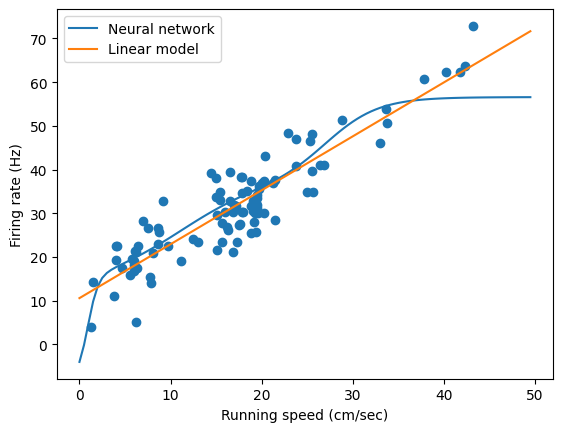

In [66]:
plt.scatter(speed,rate)
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

### Neural networks can model all sorts of functions

Let's try our two models on some non-linear problems

In [67]:
X = torch.arange(0,10,0.1).unsqueeze(1)
print(X.shape)
y = torch.sin(X)*4 + torch.randn(100, 1)

torch.Size([100, 1])


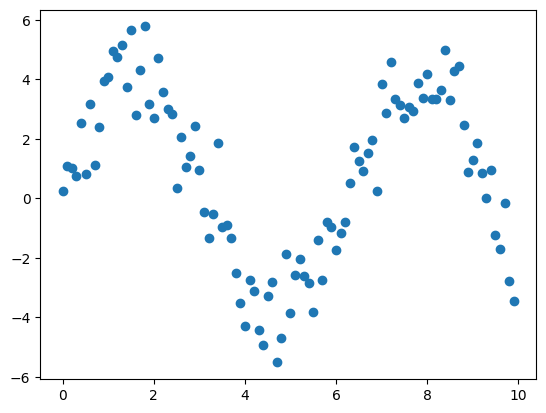

In [68]:
plt.scatter(X.numpy(),y.numpy())

In [69]:
learning_rate=0.001
optimizer = optim.SGD(nn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=nn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 313.0195007324219
Epoch: 1, Loss: 20.713672637939453
Epoch: 2, Loss: 17.930566787719727
Epoch: 3, Loss: 15.688132286071777
Epoch: 4, Loss: 13.870314598083496
Epoch: 5, Loss: 12.393712997436523
Epoch: 6, Loss: 11.195788383483887
Epoch: 7, Loss: 10.227682113647461
Epoch: 8, Loss: 9.449809074401855
Epoch: 9, Loss: 8.829096794128418
Epoch: 1000, Loss: 5.133082866668701
Epoch: 2000, Loss: 4.6006317138671875
Epoch: 3000, Loss: 3.865853786468506
Epoch: 4000, Loss: 3.254688024520874
Epoch: 5000, Loss: 3.002492904663086
Epoch: 6000, Loss: 2.8843188285827637
Epoch: 7000, Loss: 2.812387704849243
Epoch: 8000, Loss: 2.760122060775757
Epoch: 9000, Loss: 2.7161331176757812
Epoch: 10000, Loss: 2.6752820014953613
Epoch: 11000, Loss: 2.635413408279419
Epoch: 12000, Loss: 2.5960824489593506
Epoch: 13000, Loss: 2.557698965072632
Epoch: 14000, Loss: 2.5212607383728027
Epoch: 15000, Loss: 2.4877676963806152
Epoch: 16000, Loss: 2.4578697681427
Epoch: 17000, Loss: 2.4317479133605957
Epoch: 180

In [70]:
learning_rate=0.001
optimizer = optim.SGD(lin_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=lin_model,
              X = X,
              y=y)

Epoch: 0, Loss: 273.388671875
Epoch: 1, Loss: 241.46095275878906
Epoch: 2, Loss: 213.6760711669922
Epoch: 3, Loss: 189.49615478515625
Epoch: 4, Loss: 168.45310974121094
Epoch: 5, Loss: 150.13970947265625
Epoch: 6, Loss: 134.2014617919922
Epoch: 7, Loss: 120.3301010131836
Epoch: 8, Loss: 108.25720977783203
Epoch: 9, Loss: 97.74931335449219
Epoch: 1000, Loss: 15.217514991760254
Epoch: 2000, Loss: 10.617217063903809
Epoch: 3000, Loss: 8.912283897399902
Epoch: 4000, Loss: 8.280413627624512
Epoch: 5000, Loss: 8.046236038208008
Epoch: 6000, Loss: 7.959446907043457
Epoch: 7000, Loss: 7.927281379699707
Epoch: 8000, Loss: 7.915359973907471
Epoch: 9000, Loss: 7.910943031311035
Epoch: 10000, Loss: 7.909305572509766
Epoch: 11000, Loss: 7.908698558807373
Epoch: 12000, Loss: 7.908473491668701
Epoch: 13000, Loss: 7.908390045166016
Epoch: 14000, Loss: 7.908358573913574
Epoch: 15000, Loss: 7.908348560333252
Epoch: 16000, Loss: 7.908343315124512
Epoch: 17000, Loss: 7.908341884613037
Epoch: 18000, Loss: 

In [71]:
t_range = torch.arange(0,10,0.2).unsqueeze(1)
t_range.shape

torch.Size([50, 1])

In [72]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)

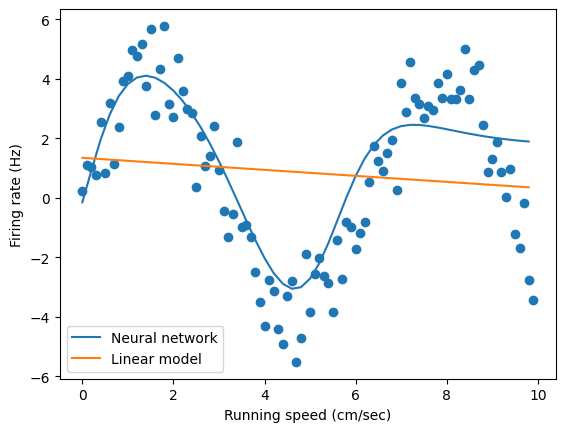

In [73]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

The non-linearity in the artifical neurons makes it possible to fit all sorts of function.

Here, the neural network is a better approximation of the underlying data. 

## Exercise

### Improve our neural network model

Our neural network is good but it is not perfect. 

How could you modify this model to make it fit the data more closely?

Have a go at trying to improve its predictions.

## Adding more hidden layers to create a deep neural network

**Deep neural networks** have several hidden layers.

* The output of the first layer have a shape similar to the activiation function.
* The next level can combine the inputs of the first layers to create more complex functions.


Text(0, 0.5, 'output')

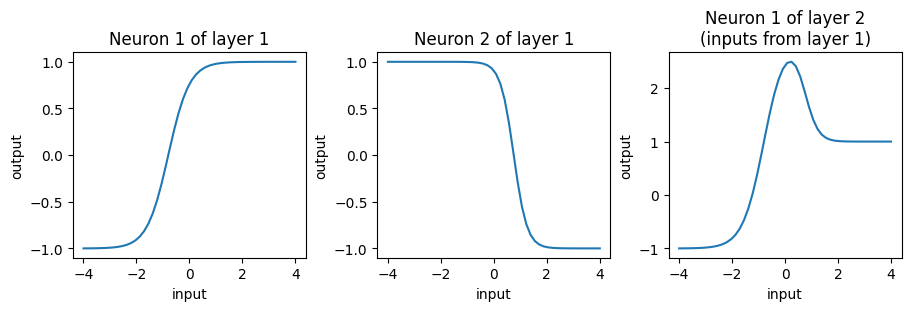

In [89]:
nrow=1
ncol=3
fig, ax = plt.subplots(nrow,ncol,figsize=(9,3),layout='constrained')

XX = np.linspace(-4,4) # input
      
# 
w1=1.25
b1=1.0                
ax[0].plot(XX,np.tanh(w1*XX+b1))
ax[0].set_title("Neuron 1 of layer 1")
ax[0].set_xlabel("input")
ax[0].set_ylabel("output")

w2=-2
b2=1.5
ax[1].plot(XX,np.tanh(w2*XX+b2))
ax[1].set_title("Neuron 2 of layer 1")
ax[1].set_xlabel("input")
ax[1].set_ylabel("output")

w3=[2,1]
b3=2
ax[2].plot(XX,w3[0]*np.tanh(w1*XX+b1)+ w3[1]*np.tanh(w2*XX+b2))
ax[2].set_title("Neuron 1 of layer 2\n(inputs from layer 1)")
ax[2].set_xlabel("input")
ax[2].set_ylabel("output")

In [75]:
class DNN_model(nn.Module):
    """
    Class to create pytorch model. This is a neural network because of the non-linear function.
    """
    def __init__(self):
        """
        Initializer. Runs when an object is created
        """
        super().__init__()
        self.layer1 = nn.Linear(in_features=1, out_features=10, bias=True)
        self.layer2 = nn.Linear(in_features=10, out_features=10, bias=True)
        self.layer3 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.tanh = nn.Tanh()
        
        
    def forward(self,x):
        """
        Make predictions with our model
        """
        out = self.tanh(self.layer1(x))
        out = self.tanh(self.layer2(out))
        out = self.layer3(out)
        
        return out

In [76]:
dnn_model = DNN_model()

In [77]:
for name, p in dnn_model.named_parameters():
    print(name,p)

layer1.weight Parameter containing:
tensor([[ 0.8691],
        [ 0.2311],
        [ 0.7053],
        [ 0.4729],
        [-0.0773],
        [-0.8830],
        [ 0.2412],
        [-0.3003],
        [-0.8911],
        [-0.3012]], requires_grad=True)
layer1.bias Parameter containing:
tensor([-0.9048, -0.9737,  0.2754,  0.0515,  0.4312, -0.1751, -0.3603,  0.6847,
        -0.9713,  0.4284], requires_grad=True)
layer2.weight Parameter containing:
tensor([[ 1.8190e-01,  1.9873e-01,  2.0952e-02, -2.9246e-01, -1.7676e-01,
         -2.7466e-01,  1.1256e-01,  5.0946e-02, -1.9160e-03,  1.0860e-01],
        [ 2.5316e-01, -1.1818e-01,  3.0392e-01,  2.5108e-01, -1.3811e-01,
          1.2128e-01, -2.6449e-01,  1.6795e-01,  1.0652e-01, -1.3589e-01],
        [-2.8717e-01,  4.1029e-02,  3.0473e-01, -1.4245e-01, -5.8465e-02,
         -1.6240e-01, -2.7052e-01, -1.6696e-01,  1.3493e-01,  4.7516e-02],
        [-2.4695e-01,  2.5481e-01,  5.9276e-02,  2.2617e-01, -2.7898e-01,
          1.8198e-01, -1.6137e-01, 

In [78]:
print("Number of parameters:", sum(p.numel() for p in dnn_model.parameters()))

Number of parameters: 141


In [79]:
learning_rate=0.001
optimizer = optim.SGD(dnn_model.parameters(),lr=learning_rate)
training_loop(n_epochs = 40000,
              optimizer = optimizer,
              loss_fn = loss_fn,
              model=dnn_model,
              X = X,
              y=y)

Epoch: 0, Loss: 8.643122673034668
Epoch: 1, Loss: 8.636844635009766
Epoch: 2, Loss: 8.630643844604492
Epoch: 3, Loss: 8.624516487121582
Epoch: 4, Loss: 8.618461608886719
Epoch: 5, Loss: 8.612478256225586
Epoch: 6, Loss: 8.606566429138184
Epoch: 7, Loss: 8.600724220275879
Epoch: 8, Loss: 8.594949722290039
Epoch: 9, Loss: 8.589244842529297
Epoch: 1000, Loss: 7.137521266937256
Epoch: 2000, Loss: 6.664769172668457
Epoch: 3000, Loss: 6.4749650955200195
Epoch: 4000, Loss: 6.291868686676025
Epoch: 5000, Loss: 6.05290412902832
Epoch: 6000, Loss: 5.526475429534912
Epoch: 7000, Loss: 4.037363052368164
Epoch: 8000, Loss: 3.0122039318084717
Epoch: 9000, Loss: 2.64323353767395
Epoch: 10000, Loss: 2.477410316467285
Epoch: 11000, Loss: 2.3831374645233154
Epoch: 12000, Loss: 2.32415771484375
Epoch: 13000, Loss: 2.2851102352142334
Epoch: 14000, Loss: 2.255967140197754
Epoch: 15000, Loss: 2.0785038471221924
Epoch: 16000, Loss: 1.9277423620224
Epoch: 17000, Loss: 1.7557563781738281
Epoch: 18000, Loss: 1.

In [80]:
lin_yhat = lin_model(t_range)
nn_yhat = nn_model(t_range)
dnn_yhat = dnn_model(t_range)

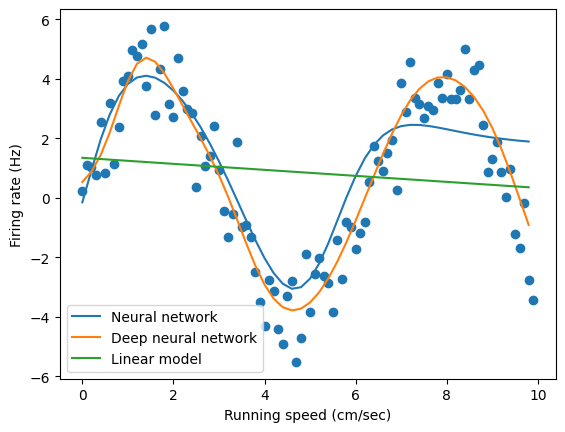

In [81]:
plt.scatter(X.numpy(),y.numpy())
plt.plot(t_range.numpy(),nn_yhat.detach().numpy(),label="Neural network")
plt.plot(t_range.numpy(),dnn_yhat.detach().numpy(),label="Deep neural network")
plt.plot(t_range.numpy(),lin_yhat.detach().numpy(),label="Linear model")
plt.xlabel("Running speed (cm/sec)")
plt.ylabel("Firing rate (Hz)")
plt.legend()

# Exercise

Train a neural network that would predict the firing rate of a neuron based on speed and acceleration.